In [1]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [3]:
# convert numpy to tensor or vise versa
np_data = np.arange(6).reshape((2, 3))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()
print'numpy array:', np_data,          
print '\ntorch tensor:', torch_data, type(torch_data)
print '\ntensor to array:', tensor2array

numpy array: [[0 1 2]
 [3 4 5]] 
torch tensor: 
 0  1  2
 3  4  5
[torch.LongTensor of size 2x3]
 <class 'torch.LongTensor'>

tensor to array: [[0 1 2]
 [3 4 5]]


In [4]:
print torch_data.size(), torch_data.type()

torch.Size([2, 3]) torch.LongTensor


In [5]:
data = [-1, -2, 1, 2]
tensor = torch.FloatTensor(data)  # 32-bit floating point
print(
    '\nabs',
    '\nnumpy: ', np.abs(data),          # [1 2 1 2]
    '\ntorch: ', torch.abs(tensor)      # [1 2 1 2]
)


('\nabs', '\nnumpy: ', array([1, 2, 1, 2]), '\ntorch: ', 
 1
 2
 1
 2
[torch.FloatTensor of size 4]
)


In [6]:
tensor.size()

torch.Size([4])

In [18]:
tensor = torch.FloatTensor([[1,2],[3,4]])            # build a tensor
tensor1 = torch.FloatTensor([[3, 4], [5, 6]])
variable = Variable(tensor, requires_grad=True)      # build a variable, usually for compute gradients
var1 = Variable(tensor1, requires_grad=True)

In [13]:
#var = variable.cuda()
# print var

# print var.cpu()

In [9]:
print(tensor)       # [torch.FloatTensor of size 2x2]
print(variable)     # [torch.FloatTensor of size 2x2]
print(var1)


 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 3  4
 5  6
[torch.FloatTensor of size 2x2]



In [32]:
t_out = torch.mean(tensor*tensor1)       # x^2
v_out = torch.mean(variable*var1)   # x^2
print(t_out)
print(v_out)    # 7.5

12.5
Variable containing:
 12.5000
[torch.FloatTensor of size 1]



In [33]:
v_out.backward()    # backpropagation from v_out
# v_out = 1/4 * sum(variable*variable)
# the gradients w.r.t the variable, d(v_out)/d(variable) = 1/4*2*variable = variable/2
print(variable.grad)
print(var1.grad)


print(variable)     # this is data in variable format


print(variable.data)    # this is data in tensor format


print(variable.data.numpy())    # numpy format


Variable containing:
 3.7500  5.0000
 6.2500  7.5000
[torch.FloatTensor of size 2x2]

Variable containing:
 1.2500  2.5000
 3.7500  5.0000
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]


 1  2
 3  4
[torch.FloatTensor of size 2x2]

[[1. 2.]
 [3. 4.]]


In [35]:
x = torch.linspace(-5, 5, 200)  # x data (tensor), shape=(100, 1)
x = Variable(x)
x_np = x.data.numpy()   # numpy array for plotting

In [36]:
y_relu = F.relu(x).data.numpy()
y_sigmoid = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

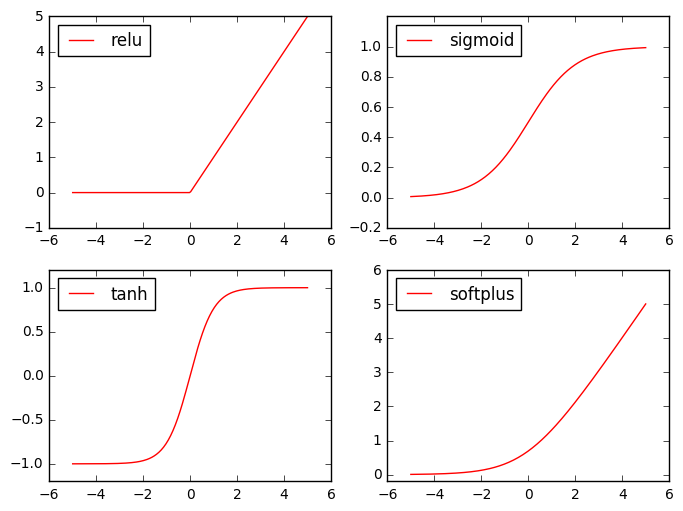

In [37]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()